<a href="https://colab.research.google.com/github/Equipe16-IAA/IAA015/blob/main/IAA015_Caixeiro_Viajante_GA_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from random import randint, random
import random
import matplotlib.pyplot as plt
import math
import copy

#Criando as funções principais do Algorítmo Genético

## Criando as coordenadas das 100 cidades

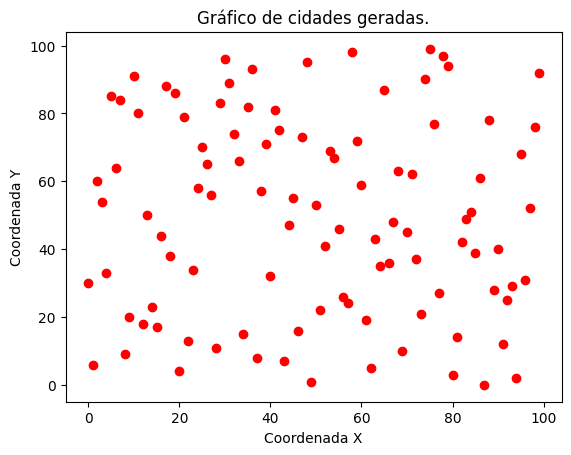

In [4]:
NRO_CIDADES = 100

x_points = list(range(NRO_CIDADES))
y_points = list(range(NRO_CIDADES))

random.shuffle(x_points)
random.shuffle(y_points)

plt.title("Gráfico de cidades geradas.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')
plt.show()

###População Inicial

In [5]:
def populacaoInicial(tamanho):
  percursos = []
  percurso = []
  for i in range(0, tamanho):
    cidades = list(range(0, NRO_CIDADES))
    listaCidades = cidades.copy()
    random.shuffle(listaCidades)
    for cidade in cidades:
      cidadePercurso = random.choice(listaCidades)
      listaCidades.remove(cidadePercurso)
      percurso.append(cidadePercurso)
    percursos.append(percurso)
    percurso = []
    cidades = []
  return percursos;

In [6]:
##DEBUG função População Inicial

percursos = populacaoInicial(2)

for percurso in percursos:
  print(percurso)

[6, 44, 54, 66, 25, 90, 81, 47, 2, 77, 50, 84, 97, 23, 4, 67, 49, 16, 58, 5, 17, 29, 12, 0, 33, 15, 65, 19, 27, 24, 42, 11, 14, 37, 76, 93, 86, 31, 53, 70, 98, 95, 55, 60, 83, 68, 63, 56, 59, 79, 75, 51, 74, 92, 91, 78, 94, 69, 64, 39, 7, 34, 21, 45, 10, 46, 13, 99, 30, 28, 3, 87, 57, 41, 22, 38, 9, 18, 36, 26, 85, 32, 52, 61, 8, 1, 82, 35, 73, 20, 71, 48, 88, 43, 89, 80, 72, 62, 96, 40]
[68, 79, 3, 32, 89, 30, 12, 15, 77, 54, 31, 93, 53, 21, 35, 25, 14, 87, 0, 67, 63, 44, 47, 84, 50, 99, 71, 43, 9, 82, 72, 98, 24, 70, 69, 75, 34, 28, 90, 22, 74, 39, 65, 26, 64, 91, 80, 48, 7, 92, 62, 60, 6, 1, 57, 36, 40, 81, 2, 20, 13, 42, 97, 55, 5, 38, 88, 8, 46, 27, 61, 86, 33, 18, 49, 94, 66, 58, 4, 59, 73, 16, 11, 41, 83, 23, 76, 45, 56, 52, 51, 37, 85, 95, 96, 78, 29, 17, 10, 19]


###Verifica Elementos Duplicados

In [7]:
def has_duplicates(lst):
    n = max(set(lst), key=lst.count)
    return lst.count(n) > 1

In [8]:
##DEBUG função duplicados
listaDuplicados = [2, 1, 2, 5, 2]
print(has_duplicates(listaDuplicados))

listaSemDuplicados = [1, 2, 3, 4, 5]
print(has_duplicates(listaSemDuplicados))

True
False


###Função de Avaliação (fit)

In [9]:
##Calcular Distância Euclidiana
##distancia = sqrt(((x2 - x1) ^ 2) + ((y2 - y1) ^ 2));
def FuncaoDeAvaliacao(percursos):
  soma_distancia = np.zeros(len(percursos));
  for index, percurso in enumerate(percursos):
    for i, cidade in enumerate(percurso):
      if i < (len(percurso) - 1):
        soma_distancia[index] += math.sqrt((x_points[percurso[i + 1]] - x_points[percurso[i]])**2 + (y_points[percurso[i + 1]] - y_points[percurso[i]])**2);
      else:
        soma_distancia[index] += math.sqrt((x_points[percurso[i]] - x_points[percurso[0]])**2 + (y_points[percurso[i]] - y_points[percurso[0]])**2);
    if has_duplicates(percurso):
      soma_distancia[index] = 999999999
  return soma_distancia;


def FuncaoDeAvaliacaoV2(percurso):
  soma_distancia = 0
  for i, cidade in enumerate(percurso):
    if i < (len(percurso) - 1):
      soma_distancia += math.sqrt((x_points[percurso[i + 1]] - x_points[percurso[i]])**2 + (y_points[percurso[i + 1]] - y_points[percurso[i]])**2);
    else:
      soma_distancia += math.sqrt((x_points[percurso[i]] - x_points[percurso[0]])**2 + (y_points[percurso[i]] - y_points[percurso[0]])**2);
  if has_duplicates(percurso):
    soma_distancia = 999999999
  return soma_distancia;


In [10]:
##DEBUG Função de Avaliação

percursos = populacaoInicial(2)
print(percursos)
avaliacao = FuncaoDeAvaliacao(percursos)
print(avaliacao)

print(f'funcao v2 {FuncaoDeAvaliacaoV2(percursos[0])}')

[[84, 37, 77, 3, 60, 68, 54, 93, 13, 34, 7, 6, 32, 85, 44, 26, 33, 89, 14, 58, 5, 96, 11, 64, 42, 59, 39, 87, 30, 57, 90, 61, 27, 92, 18, 4, 46, 82, 88, 43, 47, 40, 41, 29, 78, 52, 2, 66, 20, 10, 22, 62, 1, 50, 86, 97, 35, 53, 19, 9, 56, 76, 71, 72, 48, 83, 21, 95, 80, 15, 74, 65, 23, 17, 91, 45, 38, 55, 67, 98, 31, 16, 49, 25, 99, 69, 51, 94, 12, 36, 73, 79, 8, 28, 24, 63, 70, 75, 0, 81], [88, 58, 99, 96, 48, 55, 16, 33, 28, 81, 89, 23, 80, 20, 34, 45, 7, 39, 27, 86, 29, 95, 41, 40, 2, 36, 84, 32, 43, 92, 87, 49, 3, 74, 93, 24, 10, 14, 66, 50, 59, 57, 35, 68, 22, 98, 91, 15, 72, 37, 77, 79, 9, 97, 38, 67, 90, 64, 17, 18, 60, 25, 76, 94, 42, 5, 62, 69, 4, 70, 63, 73, 11, 71, 75, 12, 19, 61, 82, 0, 26, 56, 8, 21, 51, 52, 65, 85, 6, 44, 31, 13, 46, 83, 47, 78, 53, 30, 1, 54]]
[4970.17091889 5405.08856186]
funcao v2 4970.170918894449


###Preserva Melhor da Geração

In [22]:
def preservaMelhor(geracao, novaGeracao):
  avaliacao = FuncaoDeAvaliacao(geracao)
  maior = 0
  for i in range(len(avaliacao)):
    if avaliacao[maior] > avaliacao[i]:
      maior = i
  #print(avaliacao[maior])
  novaGeracao.append(geracao[maior])


In [12]:
#Debug preservar melhor geraçao
novaGeracao = []
preservaMelhor(percursos, novaGeracao)
print(novaGeracao)

4970.170918894449
[[84, 37, 77, 3, 60, 68, 54, 93, 13, 34, 7, 6, 32, 85, 44, 26, 33, 89, 14, 58, 5, 96, 11, 64, 42, 59, 39, 87, 30, 57, 90, 61, 27, 92, 18, 4, 46, 82, 88, 43, 47, 40, 41, 29, 78, 52, 2, 66, 20, 10, 22, 62, 1, 50, 86, 97, 35, 53, 19, 9, 56, 76, 71, 72, 48, 83, 21, 95, 80, 15, 74, 65, 23, 17, 91, 45, 38, 55, 67, 98, 31, 16, 49, 25, 99, 69, 51, 94, 12, 36, 73, 79, 8, 28, 24, 63, 70, 75, 0, 81]]


##Cruzamento Genético

In [15]:
##TODO - Implementar cruzamento OX, para evitar repetição

def cruzamento(geracao, num, nova):
  while True:
    for i in range(0, num):
      indA = random.randrange(0,len(geracao))
      indB = indA;
      while indA==indB:
        indB = random.randrange(0,len(geracao))
      #print(f'cruzamento {indA} e {indB}')
      ponto1 = random.randrange(1,round((len(geracao[0]) - 1)))
      #print(f'ponto de corte {ponto1}')

      paiA = geracao[indA]
      paiB = geracao[indB]

      res1 = list(set(paiA[0:ponto1]) & set(paiB[ponto1:]))
      res2 = list(set(paiB[0:ponto1]) & set(paiA[ponto1:]))

      cromossomosA = paiA[0:ponto1]
      cromossomosB = paiB[ponto1:]
      for i in range(0, len(res1)):
        cromossomosB.remove(res1[i])
        cromossomosB.append(res2[i])

      filho1 = cromossomosA
      filho1.extend(cromossomosB)
      #print(f'filho1 {filho1} duplicado? {has_duplicates(filho1)}')
      nova.append(filho1)
    break





In [16]:
##DEBUG cuzamento
novaGeracao = []
geracao = populacaoInicial(5)
print(geracao)
#preservaMelhor(geracao, novaGeracao)
cruzamento(geracao, 4, novaGeracao)
print(geracao)
print(novaGeracao)

[[85, 45, 2, 48, 80, 43, 46, 96, 70, 8, 92, 38, 9, 47, 6, 65, 36, 57, 44, 54, 69, 74, 19, 14, 52, 35, 93, 0, 72, 51, 60, 13, 15, 1, 24, 22, 61, 97, 53, 27, 71, 39, 18, 32, 33, 31, 86, 50, 98, 89, 83, 64, 63, 20, 66, 4, 99, 11, 76, 29, 59, 78, 3, 42, 95, 28, 82, 23, 5, 12, 17, 7, 40, 81, 10, 67, 34, 75, 25, 37, 58, 77, 21, 79, 68, 55, 41, 84, 73, 16, 94, 88, 26, 91, 90, 30, 49, 56, 62, 87], [11, 77, 29, 85, 31, 24, 63, 67, 90, 82, 66, 48, 61, 23, 21, 87, 9, 72, 92, 80, 28, 76, 58, 86, 19, 57, 38, 62, 65, 88, 59, 69, 54, 39, 41, 99, 7, 73, 3, 64, 70, 26, 32, 52, 95, 33, 84, 53, 50, 98, 14, 71, 37, 68, 10, 42, 40, 1, 6, 74, 0, 94, 12, 30, 35, 45, 97, 16, 91, 96, 20, 27, 43, 8, 93, 89, 36, 46, 81, 60, 15, 56, 18, 79, 34, 55, 47, 49, 2, 75, 25, 78, 22, 44, 83, 51, 5, 13, 4, 17], [49, 80, 9, 98, 0, 18, 70, 69, 45, 77, 63, 44, 68, 30, 83, 81, 52, 94, 27, 54, 24, 47, 51, 67, 39, 64, 7, 13, 92, 15, 14, 29, 23, 42, 35, 1, 97, 57, 79, 50, 19, 26, 60, 25, 96, 87, 10, 46, 88, 73, 65, 43, 84, 91, 71

##Mutação

In [49]:
#TODO: Implementar verificação de avaliação antes de inserir o individuo que sofreu mutação na solução, incluir porcentagem para isso ocorrer

def mutacao(geracao, taxaMutacao):
  if randint(1,100) <= taxaMutacao:
    individuoMutacao = random.randrange(0,len(geracao))
    print(f'Realizando mutacao no Individuo:  {individuoMutacao}')
    gene_1 = random.randrange(0,len(geracao[0]))
    gene_2 = random.randrange(0,len(geracao[0]))
    while gene_1 == gene_2:
      gene_2 = random.randrange(0,len(geracao[0]))
    copiaGeracao = copy.deepcopy(geracao)
    temp = copiaGeracao[individuoMutacao][gene_1]
    copiaGeracao[individuoMutacao][gene_1] = copiaGeracao[individuoMutacao][gene_2]
    copiaGeracao[individuoMutacao][gene_2] = temp
    #print(f'Individuo a ser mutado:  {geracao[individuoMutacao]} //Resultado após mutação:  {copiaGeracao[individuoMutacao]}')
    avaliacaoCopia = FuncaoDeAvaliacaoV2(copiaGeracao[individuoMutacao])
    avaliacaoGeracao = FuncaoDeAvaliacaoV2(geracao[individuoMutacao])
    #print(f'Avaliação antes da mutação: {avaliacaoGeracao}')
    #print(f'Avaliação após a mutação: {avaliacaoCopia}')
    ##30% de chances de verificar se a mutação criou individuo melhor antes de executar a mutação
    if random.randrange(0,100) < 101: ##Forcando a sempre entrar aqui para testes
      print(f'Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...')
      if avaliacaoCopia < avaliacaoGeracao:
        print(f'Avaliação superior ao anterior, enviando para a mansão X')
        geracao[individuoMutacao] = copiaGeracao[individuoMutacao]
      else:
        print(f'Avaliação abaixo do anterior, tentando uma nova mutacao ...')
        mutacao(geracao,100)
    else:
      print(f'Mutação não considerou avaliação')
      geracao[individuoMutacao] = copiaGeracao[individuoMutacao]




In [50]:
#Teste Mutacao

geracao = populacaoInicial(100)
print(geracao)

for i in range(0,100):
  mutacao(geracao, 100)
print(geracao)

[[22, 60, 89, 51, 87, 78, 42, 74, 43, 1, 90, 61, 25, 23, 92, 93, 13, 12, 17, 94, 35, 79, 68, 6, 15, 19, 30, 16, 70, 53, 96, 49, 58, 11, 67, 8, 31, 27, 88, 81, 46, 66, 77, 57, 65, 14, 4, 28, 85, 20, 97, 56, 75, 47, 84, 59, 80, 99, 91, 10, 38, 9, 55, 37, 44, 3, 98, 7, 39, 54, 33, 72, 69, 0, 63, 76, 29, 52, 24, 32, 64, 62, 18, 73, 21, 26, 34, 95, 41, 83, 2, 71, 48, 50, 5, 45, 82, 36, 86, 40], [36, 99, 41, 19, 80, 30, 92, 60, 39, 88, 52, 98, 37, 21, 93, 84, 63, 42, 6, 82, 83, 14, 15, 27, 47, 5, 10, 65, 68, 12, 17, 67, 75, 73, 24, 3, 76, 1, 58, 34, 59, 97, 16, 32, 9, 20, 7, 96, 69, 13, 79, 22, 74, 66, 72, 64, 38, 71, 70, 35, 94, 95, 29, 48, 62, 51, 4, 40, 25, 0, 77, 57, 33, 11, 89, 46, 31, 8, 87, 23, 45, 18, 44, 56, 55, 49, 86, 61, 91, 81, 53, 28, 26, 85, 43, 2, 78, 54, 90, 50], [40, 66, 88, 78, 81, 1, 44, 2, 9, 75, 24, 57, 42, 74, 13, 48, 58, 16, 29, 23, 11, 94, 10, 45, 93, 33, 95, 79, 80, 52, 67, 39, 14, 70, 87, 82, 83, 20, 3, 38, 41, 46, 76, 99, 89, 32, 50, 43, 85, 28, 54, 47, 30, 63, 25

##Execução do Algoritmo Genético

Distância percorrida: 4801.95256127333


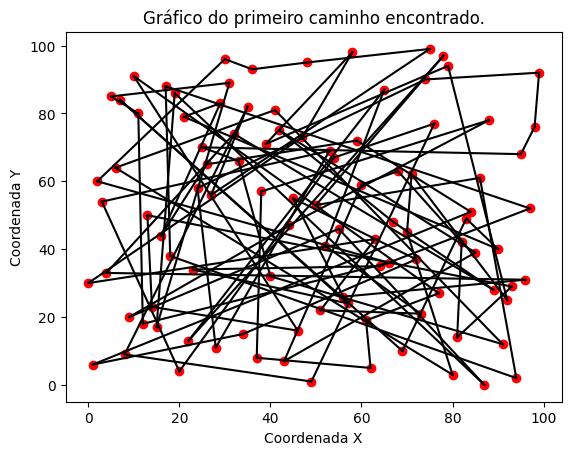

Geraçao 10000
Realizando mutacao no Individuo:  25
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação superior ao anterior, enviando para a mansão X
Realizando mutacao no Individuo:  33
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação superior ao anterior, enviando para a mansão X
Geraçao 9900
Realizando mutacao no Individuo:  31
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação abaixo do anterior, tentando uma nova mutacao ...
Realizando mutacao no Individuo:  8
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação abaixo do anterior, tentando uma nova mutacao ...
Realizando mutacao no Individuo:  74
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação abaixo do anterior, tentando uma nova mutacao ...
Realizando mutacao no Individuo:  55
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação abaixo do anterior, tentando uma nova mutacao ...
Realizan

In [57]:
#PRESETS AG
#------------------------------
numGeracoes = 10000
populacao = 100
taxaCruzamento = 90
taxaMutacao = 1
#------------------------------
p0 = populacaoInicial(populacao)
melhorPrimeiraGeracao = []
preservaMelhor(p0, melhorPrimeiraGeracao)
print(f'Distância percorrida: {FuncaoDeAvaliacaoV2(melhorPrimeiraGeracao[0])}')


plt.title("Gráfico do primeiro caminho encontrado.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')

for i in range(0, len(melhorPrimeiraGeracao[0]) - 1):
  plt.plot([x_points[melhorPrimeiraGeracao[0][i]], x_points[melhorPrimeiraGeracao[0][i + 1]]], [y_points[melhorPrimeiraGeracao[0][i]], y_points[melhorPrimeiraGeracao[0][i + 1]]], 'k-')
  if i == (len(melhorPrimeiraGeracao[0]) - 2):
    plt.plot([x_points[melhorPrimeiraGeracao[0][i + 1]], x_points[melhorPrimeiraGeracao[0][0]]], [y_points[melhorPrimeiraGeracao[0][i + 1]], y_points[melhorPrimeiraGeracao[0][0]]], 'k-')
plt.show()

avaliacaoP0 = FuncaoDeAvaliacao(p0)

geracao = copy.deepcopy(p0)
while numGeracoes > 0:

  if numGeracoes % 100 == 0:
    print(f'Geraçao {numGeracoes}')

  novaGeracao = []
  mutacao(geracao, taxaMutacao)
  preservaMelhor(geracao, novaGeracao)
  cruzamento(geracao, taxaCruzamento, novaGeracao)
  numGeracoes = numGeracoes - 1
  avaliacaoNovaGeracao = FuncaoDeAvaliacao(novaGeracao)
  novaGeracao2 = sorted(zip(avaliacaoNovaGeracao, novaGeracao), reverse=True)
  geracao = [x for _, x in novaGeracao2]



geracao = novaGeracao.copy()
novaGeracao = []
preservaMelhor(geracao, novaGeracao)




Distância percorrida: 2563.3662036682385
Duplicidade? False


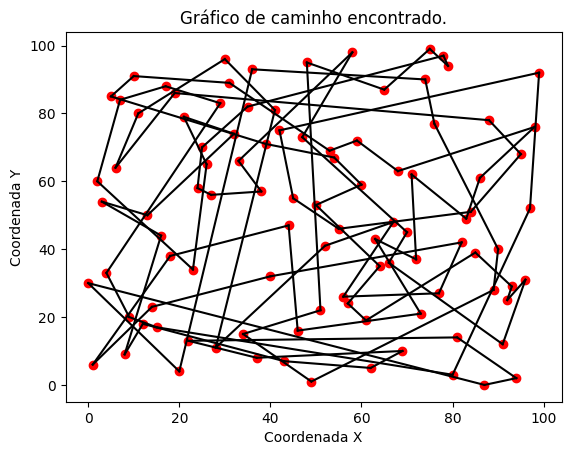

In [58]:
plt.title("Gráfico de caminho encontrado.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')

print(f'Distância percorrida: {FuncaoDeAvaliacaoV2(novaGeracao[0])}')
print(f'Duplicidade? {has_duplicates(novaGeracao[0])}')

for i in range(0, len(novaGeracao[0]) - 1):
  plt.plot([x_points[novaGeracao[0][i]], x_points[novaGeracao[0][i + 1]]], [y_points[novaGeracao[0][i]], y_points[novaGeracao[0][i + 1]]], 'k-')
  if i == (len(novaGeracao[0]) - 2):
    plt.plot([x_points[novaGeracao[0][i + 1]], x_points[novaGeracao[0][0]]], [y_points[novaGeracao[0][i + 1]], y_points[novaGeracao[0][0]]], 'k-')
plt.show()